<a href="https://colab.research.google.com/github/agb2k/ANTLR-Arithmetic-Expressions-Compilers/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Libraries

In [1]:
!pip install pandas
!pip install -U scikit-learn
!pip install forex-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 7.3 MB/s 


## Preprocessing




In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv(r'drive/MyDrive/DevKaki Data/salary-data-1.csv')

df.columns

Index(['Timestamp', 'Year', 'Gender', 'Age', 'Nationality',
       'Current Country of Residence', 'Current State of Residence',
       'Current City of Residence', 'Highest Level of Education',
       'Name of Highest Degree Obtained', 'Name of School or University',
       'Is your Education Background related to your current job?',
       'Did you go through a bootcamp to learn technical skills?',
       'Professional Certification (Eg. CCNA, CEH, GCP Cloud Associate)',
       'Name of Bootcamp Course', 'Name of Professional Certification(s)',
       'Job Title', 'What is your currency code?',
       'What is your current monthly base salary?',
       'What is your current bonus compensation per year?',
       'What is your current equity (stock) compensation per year?',
       'How many days of annual leave are you entitled to?',
       'Company Benefits',
       'What technologies do you use for work on a regular basis?',
       'Company Location', 'Company Industry',
       'What

In [3]:
# Renaming Columns
df.set_axis(['Timestamp', 'Year', 'Gender', 'Age', 'Malaysian','Current Country of Residence', 'Current State of Residence','Current City of Residence', 'Highest Level of Education','Name of Highest Degree', 'Name of School','Education Relation','Bootcamp','Professional Certification','Bootcamp Name', 'Professional Certifications Name','Job Title', 'Salary Currency Code','Salary','Yearly Bonus','Yearly Equity','Annual Leave','Company Benefits','Technologies','Company Location', 'Company Industry','Company Size','Tech Team Size','Company Name','Satisfaction', 'Experience','Number of Past Jobs','Initial Salary','Initial Salary Currency Code'], axis='columns', inplace=True)

# Removing Columns
df = df.loc[:, ~df.columns.isin(['Timestamp', 'Year', 'Current State of Residence', 'Current City of Residence', 'Satisfaction', 'Yearly Bonus',  'Yearly Equity', 'Annual Leave', 'Company Benefits', 'Company Name', 'Bootcamp Name', 'Professional Certifications Name', 'Name of Highest Degree'])]

In [4]:
idxAbroad = df.loc[((df["Current Country of Residence"] != "Malaysia") & (df["Salary Currency Code"] != "MYR"))].index
df.drop(idxAbroad, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df['Education Relation'] = lb.fit_transform(df['Education Relation'])
df['Professional Certification'] = lb.fit_transform(df['Professional Certification'])
df['Bootcamp'] = lb.fit_transform(df['Bootcamp'])

df['Malaysian'].mask(df['Malaysian'] != 'Malaysian', 'Expat', inplace=True)
df['Malaysian'] = lb.fit_transform(df['Malaysian'])

In [6]:
df.columns

Index(['Gender', 'Age', 'Malaysian', 'Current Country of Residence',
       'Highest Level of Education', 'Name of School', 'Education Relation',
       'Bootcamp', 'Professional Certification', 'Job Title',
       'Salary Currency Code', 'Salary', 'Technologies', 'Company Location',
       'Company Industry', 'Company Size', 'Tech Team Size', 'Experience',
       'Number of Past Jobs', 'Initial Salary',
       'Initial Salary Currency Code'],
      dtype='object')

In [7]:
from forex_python.converter import CurrencyRates
from forex_python.bitcoin import BtcConverter
c = CurrencyRates()
b = BtcConverter()

def convertToMYR(currencyCode, salary, df_sm):
  try:
    salary = int(salary)
    if currencyCode == 'BTC':
      currencyCode = 'MYR'
      return salary * b.get_latest_price('MYR')
    else:
      currencyCode = 'MYR'
      return c.convert(currencyCode, 'MYR', salary)
  except:
    pass

In [8]:
df['Salary'] = df.apply( lambda x: convertToMYR(x['Salary Currency Code'], x['Salary'], x), axis = 1)
df['Initial Salary'] = df.apply( lambda x: convertToMYR(x['Initial Salary Currency Code'], x['Initial Salary'], x), axis = 1)

In [9]:
df

,Gender,Age,Malaysian,Current Country of Residence,Highest Level of Education,Name of School,Education Relation,Bootcamp,Professional Certification,Job Title,Salary Currency Code,Salary,Technologies,Company Location,Company Industry,Company Size,Tech Team Size,Experience,Number of Past Jobs,Initial Salary,Initial Salary Currency Code
0,Other,23,1,Malaysia,Undergraduate Degree,NaN,1,0,0,Junior Software Developer,MYR,2200.0,PHP,MALAYSIA,HR,1-10 employees,Team of 1,0.0,0.0,NaN,MYR
1,Female,22,1,Malaysia,Undergraduate Degree,NaN,1,0,0,Intern,MYR,3300.0,Python,"Penang, Malaysia","Industrials (Manufacturing, Construction, etc.)","1,001-10,000 employees",2 - 10 people,0.0,0.0,NaN,MYR
2,Female,22,1,Malaysia,Undergraduate Degree,John Moores University,1,0,0,Intern,MYR,1000.0,Asp.net mvc,"Kuala lumpur,Msia",Gateway,51-200 employees,2 - 10 people,0.0,0.0,1000.0,MYR
3,Male,19,1,Malaysia,"Pre-university (STPM, A-Levels, Matriculation,...",Sunway University,1,0,0,Junior Fullstack Developer,MYR,1800.0,"Web, Laravel, React","Johor Bahru, Johor","Professional Services (Law, Consulting, etc.)",1-10 employees,2 - 10 people,0.0,0.0,1200.0,NaN
4,Male,21,1,Malaysia,Undergraduate Degree,Asia pacific university,1,0,0,Android Developer,MYR,1500.0,Android studio,"Selangor , malaysia","Data Infrastructure, Telecom",11-50 employees,2 - 10 people,0.0,0.0,1200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Male,40,1,Malaysia,Undergraduate Degree,UOW KDU Malaysia University & College,1,0,1,Consultant,MYR,15000.0,Java,Kl,"Data Infrastructure, Telecom",51-200 employees,2 - 10 people,10.0,10.0,1000.0,NaN
717,Male,48,1,Malaysia,Diploma,Asia Pacific University,1,0,0,Solution Architect,MYR,20000.0,Xwiki,"Selangor, MY",Financial Services,51-200 employees,11 - 50 people,30.0,10.0,1500.0,NaN
718,Male,25,1,Malaysia,Undergraduate Degree,University Malaysia Sarawak,1,0,0,Engineering Technology Coordinator,MYR,2000.0,Documentation and website development,Sarawak kuching,Government and Government Linked Companies (GLC),11-50 employees,2 - 10 people,1.0,2.0,2000.0,NaN
719,Male,38,1,Malaysia,Diploma,Tunku Abdul Rahman University College,0,0,0,Full-Stack Software Developer,MYR,3000.0,"Node,react,mysql",Selangor,Communication,1-10 employees,Team of 1,3.0,2.0,3000.0,MYR


In [10]:
import numpy as np

def get_zscore(value, values):
    """Obtain the z-score of a given value"""
    m = np.mean(values)
    s = np.std(values)
    z_score = (value - m)/s
    return np.abs(z_score)

# find outliers
outliers = list(df[df["Salary"].apply(lambda x: get_zscore(x, df["Salary"]))>0.1].index)
df.drop(outliers, inplace=True)

In [11]:
# Removing Columns
df = df.loc[:, ~df.columns.isin(['Salary Currency Code', 'Initial Salary Currency Code'])]

In [12]:
df['Experience'].astype(int)
df['Number of Past Jobs'].astype(int)
df['Salary'].astype(int)

0       2200
1       3300
2       1000
3       1800
4       1500
       ...  
716    15000
717    20000
718     2000
719     3000
720     5000
Name: Salary, Length: 690, dtype: int64

In [13]:
df.dtypes

Gender                           object
Age                               int64
Malaysian                         int64
Current Country of Residence     object
Highest Level of Education       object
Name of School                   object
Education Relation                int64
Bootcamp                          int64
Professional Certification        int64
Job Title                        object
Salary                          float64
Technologies                     object
Company Location                 object
Company Industry                 object
Company Size                     object
Tech Team Size                   object
Experience                      float64
Number of Past Jobs             float64
Initial Salary                  float64
dtype: object

In [14]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[["Highest Level of Education"]] = enc.fit_transform(df[["Highest Level of Education"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [15]:
df.to_csv('output.csv')

In [16]:
df.columns

Index(['Gender', 'Age', 'Malaysian', 'Current Country of Residence',
       'Highest Level of Education', 'Name of School', 'Education Relation',
       'Bootcamp', 'Professional Certification', 'Job Title', 'Salary',
       'Technologies', 'Company Location', 'Company Industry', 'Company Size',
       'Tech Team Size', 'Experience', 'Number of Past Jobs',
       'Initial Salary'],
      dtype='object')

## Analysis

In [17]:
df.describe(include="all")

,Gender,Age,Malaysian,Current Country of Residence,Highest Level of Education,Name of School,Education Relation,Bootcamp,Professional Certification,Job Title,Salary,Technologies,Company Location,Company Industry,Company Size,Tech Team Size,Experience,Number of Past Jobs,Initial Salary
count,690,690.000000,690.000000,690,690.000000,621,690.000000,690.000000,690.000000,690,690.000000,689,690,690,690,690,690.000000,690.000000,683.000000
unique,3,NaN,NaN,4,NaN,124,NaN,NaN,NaN,145,NaN,571,174,107,7,5,NaN,NaN,NaN
top,Male,NaN,NaN,Malaysia,NaN,Tunku Abdul Rahman University College,NaN,NaN,NaN,Software Engineer,NaN,Java,"Kuala Lumpur, Malaysia",Financial Services,11-50 employees,2 - 10 people,NaN,NaN,NaN
freq,604,NaN,NaN,687,NaN,92,NaN,NaN,NaN,131,NaN,21,131,150,175,410,NaN,NaN,NaN
mean,NaN,27.830435,0.959420,NaN,5.163768,NaN,0.814493,0.123188,0.146377,NaN,6553.394203,NaN,NaN,NaN,NaN,NaN,4.393145,1.952899,3292.493411
std,NaN,4.619194,0.197458,NaN,1.885124,NaN,0.388990,0.328892,0.353740,NaN,4244.596729,NaN,NaN,NaN,NaN,NaN,4.125690,1.806985,2070.289878
min,NaN,18.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,400.000000
25%,NaN,24.000000,1.000000,NaN,6.000000,NaN,1.000000,0.000000,0.000000,NaN,3800.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2500.000000
50%,NaN,27.000000,1.000000,NaN,6.000000,NaN,1.000000,0.000000,0.000000,NaN,5290.000000,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,3000.000000
75%,NaN,30.000000,1.000000,NaN,6.000000,NaN,1.000000,0.000000,0.000000,NaN,8000.000000,NaN,NaN,NaN,NaN,NaN,6.000000,3.000000,3500.000000


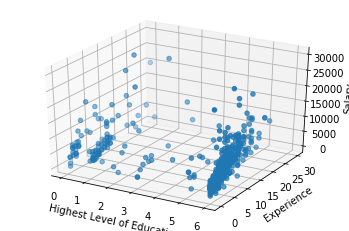

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['Highest Level of Education'], df['Experience'], df['Salary'])
threedee.set_xlabel('Highest Level of Education')
threedee.set_ylabel('Experience')
threedee.set_zlabel('Salary')
plt.show()

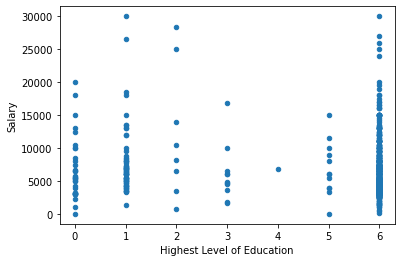

In [19]:
df.plot(kind = 'scatter', x = 'Highest Level of Education', y = 'Salary')
plt.show()

In [20]:
df.columns

Index(['Gender', 'Age', 'Malaysian', 'Current Country of Residence',
       'Highest Level of Education', 'Name of School', 'Education Relation',
       'Bootcamp', 'Professional Certification', 'Job Title', 'Salary',
       'Technologies', 'Company Location', 'Company Industry', 'Company Size',
       'Tech Team Size', 'Experience', 'Number of Past Jobs',
       'Initial Salary'],
      dtype='object')

In [21]:
X = df[['Experience']]
Y = df['Salary']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [24]:
clf.fit(x_train,y_train)

LinearRegression()

In [25]:
clf.score(x_test,y_test)

0.2356197233187286